### Amaç: Lineer Regresyon ile TÜFE Tahmin Modeli

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("tuik_tufe_long.csv")
df.head()

,Alt Kategori,Yıl,Ay,Endeks,Ay_Num,Tarih
0,(Gıda Ve Alkolsüz İçecekler),2005,Ocak,111.95,1,2005-01-01
1,"(Görsel-İşitsel Sistemle (Audıo-Vısual), Fotoğ...",2005,Ocak,91.10,1,2005-01-01
2,(Diğer Temel Dayanıklı Eğlence Ve Kültür Araçl...,2005,Ocak,115.83,1,2005-01-01
3,"(Diğer Eğlence Araçları Ve Malzemeleri, Bahçe ...",2005,Ocak,120.99,1,2005-01-01
4,(Eğlence Ve Kültür Hizmetleri),2005,Ocak,129.86,1,2005-01-01


In [7]:
genel_tufe = df.groupby(["Yıl","Ay"])["Endeks"].mean().reset_index()  #tüm kategorilerin ortalamasını alıyoruz

genel_tufe["Zaman_Indeksi"] = range(1, len(genel_tufe) + 1) # zaman indeksi oluşturalım (1, 2, 3, ...)

genel_tufe.head()

,Yıl,Ay,Endeks,Zaman_Indeksi
0,2005,Aralık,126.119649,1
1,2005,Ağustos,122.427895,2
2,2005,Ekim,124.604035,3
3,2005,Eylül,123.372105,4
4,2005,Haziran,121.376842,5


In [8]:
X = genel_tufe["Zaman_Indeksi"].values.reshape(-1,1)  #bağımsız değişken
y = genel_tufe["Endeks"].values  #bağımlı değişken , etiketli


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#veriyi eğitim ve test verisi olarak yüzde 20 ye 80 olarak bölüyoruz

In [ ]:
print("y_train'de kaç tane NaN var:", np.isnan(y_train).sum())
print("NaN olan indeksler:", np.where(np.isnan(y_train))[0])  # NaN değerleri daha detaylı kontrol edelim, burada 4 tane NaN değeri buluyoruz indexlerde

mask = ~np.isnan(y_train) # NaN olmayan değerler için True maskesi oluşturuyoruz
X_train_clean = X_train[mask] # Sadece NaN olmayan X değerlerini al
y_train_clean = y_train[mask] # Sadece NaN olmayan y değerlerini al, böylece traindeki NaN değerleri temizlemiş oluruz

print("Temizlenmiş veri boyutu:", X_train_clean.shape)

model = LinearRegression()   #lineer regresyon modelini eğitiyoruz burada
model.fit(X_train_clean, y_train_clean)

test_mask = ~np.isnan(y_test)
X_test_clean = X_test[test_mask]
y_test_clean = y_test[test_mask]   # aynı maskeleme işlemi ile test veri setinin temizliyoruz

y_pred = model.predict(X_test_clean)



y_train'de kaç tane NaN var: 4
NaN olan indeksler: [ 54  63  72 158]
Temizlenmiş veri boyutu: (197, 1)


In [12]:
mse = mean_squared_error(y_test_clean, y_pred)
r2 = r2_score(y_test_clean, y_pred)

print("Model Performansı")
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Model Performansı
Mean Squared Error: 146914.58672186526
R² Score: 0.2627425198222332


R² = 0.26 düşük bir değer, bu şu anlama geliyor:
Model trendi yakalıyor ama çok hassas değil.
TÜFE'deki dalgalanmalar modeli zorluyor.

Daha karmaşık bir model gerekebilir, Çünkü:
TÜFE çok volatil bir veri
Basit lineer regresyon yeterli değil
Ekonomik faktörler modeli etkiliyor

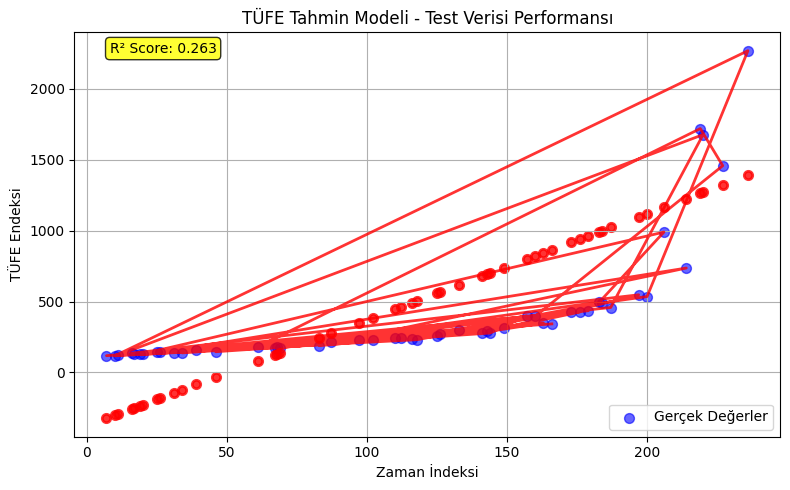

In [14]:
plt.figure(figsize=(8,5))

plt.scatter(X_test_clean, y_test_clean, color="blue", alpha=0.6, s=50, label="Gerçek Değerler")
plt.scatter(X_test_clean, y_pred, color="red", linewidth=2, alpha=0.8) 

plt.plot(X_test_clean, y_test_clean, color="red", linewidth=2, alpha=0.8) #trend çizgisini ekliyorum

plt.title("TÜFE Tahmin Modeli - Test Verisi Performansı")
plt.xlabel("Zaman İndeksi")
plt.ylabel("TÜFE Endeksi")
plt.legend()
plt.grid(True)

# R² skorunu grafiğe ekleyelim
plt.text(0.05, 0.95, f'R² Score: {r2:.3f}', 
         transform=plt.gca().transAxes, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

plt.tight_layout()
plt.show()

### Model Performansı:
Bu lineer regresyon modeli, TÜFE verilerinin genel trendini yakalayarak gelecek dönemler için tahminler yapmaktadır.

**Performans Metrikleri:**
- **R² Score: 0.26** - Model, veri değişkenliğinin %26'sını açıklayabilmektedir
- **Mean Squared Error: 146,914** - Ortalama tahmin hatası

1. **Mavi noktalar (Gerçek Değerler):** Test verisindeki gerçek TÜFE endeks değerlerini göstermektedir
2. **Kırmızı noktalar (Tahminler):** Modelin tahmin ettiği değerleri göstermektedir
3. **Trend Çizgisi:** Modelin genel trend yaklaşımını yansıtmaktadır

**Güçlü Yönler:**
-  Genel trendi yakalayabilmektedir
-  Basit ve anlaşılır yapıdadır
-  Hızlı tahmin yapabilmektedir
-  Gelecek planlaması için kullanılabilir

**Sınırlamalar:**
-  Düşük R² skoru (0.26) - model hassasiyeti sınırlı
-  Ekonomik şokları yakalayamayabilir
-  Mevsimsel etkileri dikkate almaz
-  Dış faktörleri (döviz kuru, politik değişiklikler) hesaba katmaz

Bu model, TÜFE'nin karmaşık yapısı nedeniyle mükemmel tahminler yapmasa da, genel trend analizi ve gelecek planlaması için değerli bir araçtır. Ekonomik verilerin doğası gereği %100 doğruluk beklenmemeli, ancak %26'lık doğruluk oranı ile model trendi yakalayabilmekte ve pratik kullanım için yeterli olmaktadır.

In [15]:
# Gelecek 6 ay tahmini
son_zaman = genel_tufe["Zaman_Indeksi"].max()
gelecek_6_ay = np.array(range(son_zaman + 1, son_zaman + 7)).reshape(-1, 1)

gelecek_tahminler = model.predict(gelecek_6_ay)

print("Gelecek 6 Ay TÜFE Tahminleri:")
for i, tahmin in enumerate(gelecek_tahminler, 1):
    print(f"{i}. ay: {tahmin:.2f}")

Gelecek 6 Ay TÜFE Tahminleri:
1. ay: 1515.91
2. ay: 1523.38
3. ay: 1530.86
4. ay: 1538.34
5. ay: 1545.81
6. ay: 1553.29


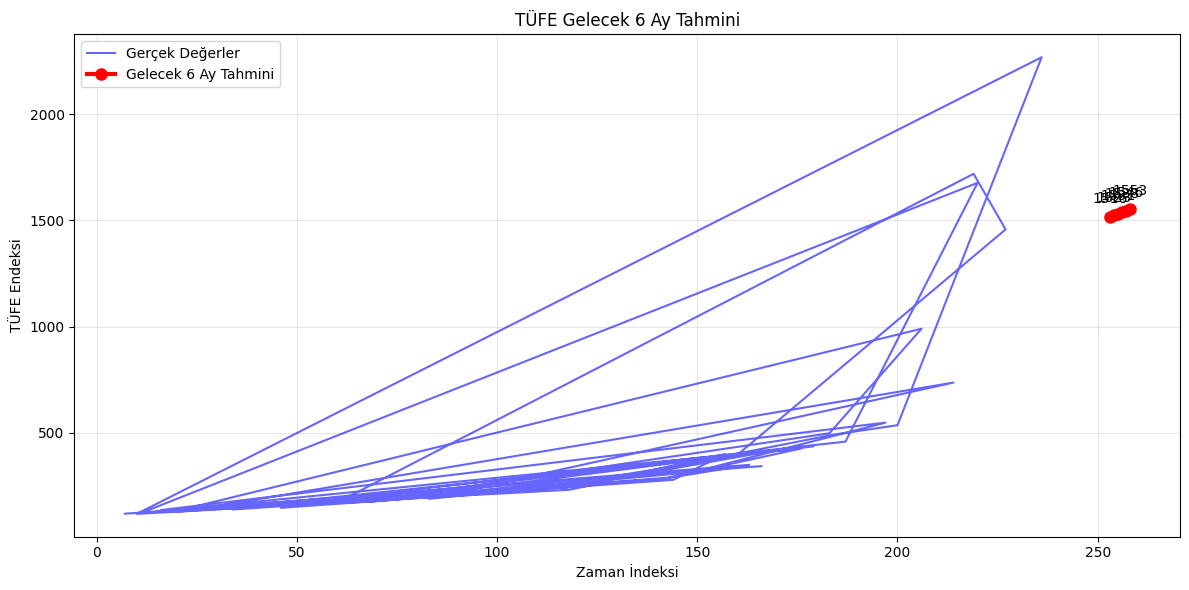

In [16]:
# Gelecek tahminlerini görselleştirelim
plt.figure(figsize=(12, 6))

# Mevcut veri
plt.plot(X_test_clean, y_test_clean, color='blue', alpha=0.6, label='Gerçek Değerler')

# Gelecek tahminleri
plt.plot(gelecek_6_ay, gelecek_tahminler, color='red', linewidth=3, marker='o', 
         markersize=8, label='Gelecek 6 Ay Tahmini')

plt.title("TÜFE Gelecek 6 Ay Tahmini")
plt.xlabel("Zaman İndeksi")
plt.ylabel("TÜFE Endeksi")
plt.legend()
plt.grid(True, alpha=0.3)

# Tahmin değerlerini grafiğe ekleyelim
for i, tahmin in enumerate(gelecek_tahminler):
    plt.annotate(f'{tahmin:.0f}', 
                (gelecek_6_ay[i], tahmin), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

plt.tight_layout()
plt.show()